# Importing Libraries


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Reading CSV File

In [2]:
train = pd.read_csv(r'C:\Users\Mridul\Desktop\train.csv')
data =  pd.read_csv(r'C:\Users\Mridul\Desktop\train.csv')
test = pd.read_csv(r'C:\Users\Mridul\Desktop\test.csv')

# Dataset Print

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable Description <br><br>

1. Survived : 	Survival	    0 = No, 1 = Yes <br>
2. Pclass	:   Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd <br>
3. Sex	    :	Gender    <br>
4. Age	    :   Age in years	<br>
5. SibSp	:   # of siblings / spouses aboard the Titanic	<br>
6. Parch	:   # of parents / children aboard the Titanic	<br>
7. Ticket	:   Ticket number	<br>
8. Fare	    :   Passenger's ticket fare	 <br>
9. Cabin	:   Cabin number	<br>
10. Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton <br>

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Print the number of datapoints and features.

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

# Deleteing unecessary features

In [7]:
del train['PassengerId']
del train['Name']
del train['Ticket']
del train['Cabin']



del test['PassengerId']
del test['Name']
del test['Ticket']
del test['Cabin']

Feautures like PassengerId , Name , Ticket and cabin have no great influence on determining the survival of a person.

In [8]:
test.shape

(418, 7)

# Checking unique values/variability of every columns altogether


In [9]:
train.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

# Checking type of variable in the data set


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


We can see that Age and Embarked  features have missing value and there is Sex , Survived , Embarked have categorical value.

# Datapoint per class

In [11]:
train["Survived"] = train["Survived"].apply(lambda x: "Survived" if x == 1 else "Died")
train["Survived"].value_counts()

Died        549
Survived    342
Name: Survived, dtype: int64

It can be consiedered as a balanced dataset.

# Check for missing values

In [12]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [13]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

# Encoding categorical data

For encoding data: <br>
1) For Gender: <br>
    We replace male as 1 and female as 0 as it is binary classifier <br>
2) For Embarked: <br>
    We have three option (Q,C,S) so we create 3 columns each representing the embarked status in binary.<br>
    But in the set we dont include all 3 coluumns but only 2 to prevent dummy variable trap.
    

In [14]:
#For train set
train["Sex"] = train["Sex"].apply(lambda x: 0 if x == "male" else 1)

train["Survived"] = train["Survived"].apply(lambda x: 1 if x == "Survived" else 0)

S = np.array(train["Embarked"].apply(lambda x: 1 if x == 'S' else 0))
C = np.array(train["Embarked"].apply(lambda x: 1 if x == 'C' else 0))
Q = np.array(train["Embarked"].apply(lambda x: 1 if x == 'Q' else 0))
S = S.reshape(train.shape[0],1)
C = C.reshape(train.shape[0],1)
Q = Q.reshape(train.shape[0],1)


train.insert(2,"Embarked(S)",S,True)
train.insert(2,"Embarked(C)",C,True)
del train["Embarked"]

train.head()


,Survived,Pclass,Embarked(C),Embarked(S),Sex,Age,SibSp,Parch,Fare
0,0,3,0,1,0,22.0,1,0,7.2500
1,1,1,1,0,1,38.0,1,0,71.2833
2,1,3,0,1,1,26.0,0,0,7.9250
3,1,1,0,1,1,35.0,1,0,53.1000
4,0,3,0,1,0,35.0,0,0,8.0500


In [15]:
# For test set

test["Sex"] = test["Sex"].apply(lambda x: 0 if x == "male" else 1)

S = np.array(test["Embarked"].apply(lambda x: 1 if x == 'S' else 0))
C = np.array(test["Embarked"].apply(lambda x: 1 if x == 'C' else 0))
Q = np.array(test["Embarked"].apply(lambda x: 1 if x == 'Q' else 0))
S = S.reshape(test.shape[0],1)
C = C.reshape(test.shape[0],1)
Q = Q.reshape(test.shape[0],1)


test.insert(2,"Embarked(S)",S,True)
test.insert(2,"Embarked(C)",C,True)

del test["Embarked"]
test.head()

,Pclass,Sex,Embarked(C),Embarked(S),Age,SibSp,Parch,Fare
0,3,0,0,0,34.5,0,0,7.8292
1,3,1,0,1,47.0,1,0,7.0000
2,2,0,0,0,62.0,0,0,9.6875
3,3,0,0,1,27.0,0,0,8.6625
4,3,1,0,1,22.0,1,1,12.2875


# Filling missing data

For filling the missing value of the we have a standard method to use the mean or median of the data. <br>
But as we have missing values both in test and training set, this method will not solve the problem as this will only solve the problem for the training data and not for the testing data as we have to predict their survival status. <br> <br>

Another approach: <br>
Using the rest of the features we can train a simple regressor model which predicts the age of the person using rest of features ie. PClass, Sex,Fare,SibSp,Parch.<br><br>
Advantages of this approach: <br>
This model is not affected by the training set as it learns from the training set.


In [16]:
x1 = train.loc[train.Age.notnull()]
test1 = train.loc[train.Age.isnull()]

y1  = x1.iloc[:,5]
x1 = x1.iloc[: , [1,2,3,4,6,7,8]]
test1 = test1.iloc[: , [1,2,3,4,6,7,8]]
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x1,y1)
y1_pred = regressor.predict(test1)
y1_pred[y1_pred <= 0] = np.min(y1)

age = train["Age"].copy()
age[np.isnan(age)] = y1_pred
train["Age"] = age
train["Age"] = train["Age"].astype(float)



In [17]:
train.isnull().sum()

Survived       0
Pclass         0
Embarked(C)    0
Embarked(S)    0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [18]:
test1 = test.loc[test.Age.isnull()]
test1 = test1.iloc[: , [0,1,2,3,5,6,7]]

y1_pred = regressor.predict(test1)
y1_pred[y1_pred <= 0] = np.min(y1)

age = test["Age"].copy()
age[np.isnan(age)] = y1_pred
test["Age"] = age
test["Age"] = test["Age"].astype(float)


In [19]:
test.isnull().sum()

Pclass         0
Sex            0
Embarked(C)    0
Embarked(S)    0
Age            0
SibSp          0
Parch          0
Fare           1
dtype: int64

In [20]:
test = test.fillna(train.Fare.mean())

As we have only one missing value of Fare in test set we can use mean fare of train set to fill the value

In [21]:
test.isnull().sum()

Pclass         0
Sex            0
Embarked(C)    0
Embarked(S)    0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [22]:
train.isnull().sum()

Survived       0
Pclass         0
Embarked(C)    0
Embarked(S)    0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

No missing value in both Training and Test set.

# Dataset description

In [23]:
train.describe()

,Survived,Pclass,Embarked(C),Embarked(S),Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.188552,0.722783,0.352413,29.459222,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.391372,0.447876,0.477990,13.536235,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,21.069337,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,1.000000,0.000000,28.318867,0.000000,0.000000,14.454200
75%,1.000000,3.000000,0.000000,1.000000,1.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200


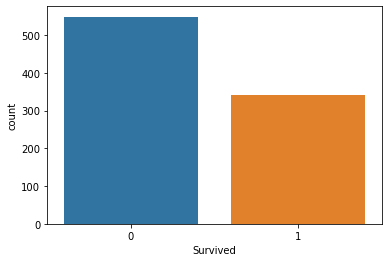

In [24]:
sns.countplot(train['Survived'])

# Checking Survival Status by a feature value

Inorder to understand who will have a better probability of survival, we can visualize the patients who survived based on age, passenger class and etc.

In [25]:
train[['Embarked(C)','Survived']].groupby(['Embarked(C)']).mean().sort_values(by='Embarked(C)',ascending=True)

,Survived
Embarked(C),
0,0.344398
1,0.553571


In [26]:
train[['Embarked(S)','Survived']].groupby(['Embarked(S)']).mean().sort_values(by='Embarked(S)',ascending=True)

,Survived
Embarked(S),
0,0.506073
1,0.336957


In [27]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Pclass',ascending=True)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


# Mean, Median, Percentile, IQR & MAD

## Mean and Median

In [28]:
Survived = train.loc[train.Survived == 1]
Dead = train.loc[train.Survived == 0]

for i in ['Age','Fare']:
    print("\nMedian of",i,)
    print("Value is= ",np.median(Survived[i]))
    print("\nMean of",i,)
    print("Value is= ",np.mean(Survived[i]))

for i in ['Age','Fare']:
    print("\nMedian of",i,)
    print("Value is= ",np.median(Dead[i]))
    print("\nMean of",i,)
    print("Value is= ",np.mean(Dead[i]))


Median of Age
Value is=  28.614632830250322

Mean of Age
Value is=  28.53680213219937

Median of Fare
Value is=  26.0

Mean of Fare
Value is=  48.39540760233917

Median of Age
Value is=  28.318867367743113

Mean of Age
Value is=  30.033843505212005

Median of Fare
Value is=  10.5

Mean of Fare
Value is=  22.117886885245877


As mean and median values are similiar no skew data is found in dataset

## Standard Deviation and MAD

In [29]:
from statsmodels import robust
for i in ['Age','Fare']:
    print("\nStandard Deviation of",i,)
    print("Value is= ",np.std(Survived[i]))
    print("\nMean Absolute Deviation of",i)
    print("Value is= ",robust.mad(Survived[i]))
    
for i in ['Age','Fare']:
    print("\nStandard Deviation of",i,)
    print("Value is= ",np.std(Dead[i]))
    print("\nMean Absolute Deviation of",i)
    print("Value is= ",robust.mad(Dead[i])) 


Standard Deviation of Age
Value is=  13.958728965117968

Mean Absolute Deviation of Age
Value is=  11.062724796130803

Standard Deviation of Fare
Value is=  66.49956280917581

Mean Absolute Deviation of Fare
Value is=  25.81269766506993

Standard Deviation of Age
Value is=  13.221165291186624

Mean Absolute Deviation of Age
Value is=  10.850968996364195

Standard Deviation of Fare
Value is=  31.359606792023406

Mean Absolute Deviation of Fare
Value is=  4.849295336288123


## Percentile and IQR

In [30]:
for i in ['Age','Fare']:
    print("\nQuantiles of:",i)
    print(np.percentile(Survived[i],np.arange(0, 100, 25)))
    print("IQR of:",i)
    print(np.percentile(Survived[i],75)-np.percentile(Survived[i],25))
    


Quantiles of: Age
[ 0.42       21.         28.61463283 36.        ]
IQR of: Age
15.0

Quantiles of: Fare
[ 0.    12.475 26.    57.   ]
IQR of: Fare
44.525


In [31]:
for i in ['Age','Fare']:
    print("\nQuantiles of:",i)
    print(np.percentile(Dead[i],np.arange(0, 100, 25)))
    print("IQR of:",i)
    print(np.percentile(Dead[i],75)-np.percentile(Dead[i],25))
    


Quantiles of: Age
[ 0.42       22.         28.31886737 37.        ]
IQR of: Age
15.0

Quantiles of: Fare
[ 0.      7.8542 10.5    26.    ]
IQR of: Fare
18.1458


# Univariate Analysis 

## Histogram

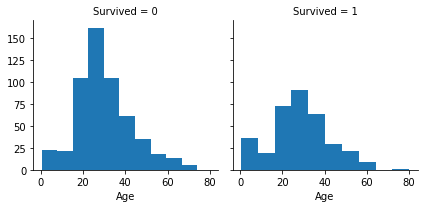

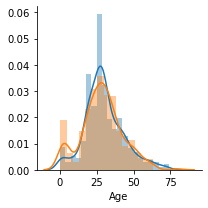

In [32]:
Pclass_Grid = sns.FacetGrid(train ,col = 'Survived')
Pclass_Grid.map(plt.hist,"Age",bins = 10)

Pclass_Grid = sns.FacetGrid(train,hue = 'Survived')
Pclass_Grid.map(sns.distplot,"Age" , rug = False , kde = True , hist = True)

Observing the histogram we can see that large majority of people who could not survive belonged to age group 20 - 30


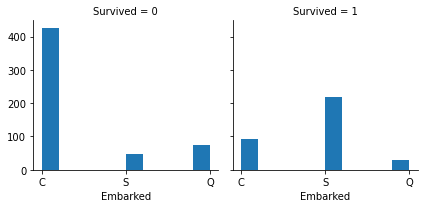

In [33]:
Pclass_Grid = sns.FacetGrid(data ,col = 'Survived')
Pclass_Grid.map(plt.hist,"Embarked")

Among those who did not survive, majority were of C. <br>
Similiarly among those who survived, mojority were of S

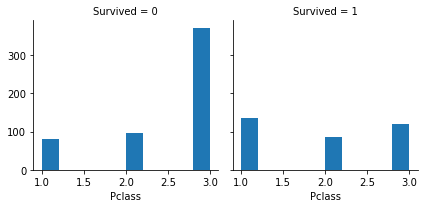

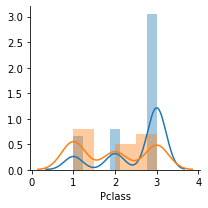

In [34]:
Pclass_Grid = sns.FacetGrid(train ,col = 'Survived')
Pclass_Grid.map(plt.hist,"Pclass")

Pclass_Grid = sns.FacetGrid(train,hue = 'Survived')
Pclass_Grid.map(sns.distplot,"Pclass" , rug = False , kde = True , hist = True)

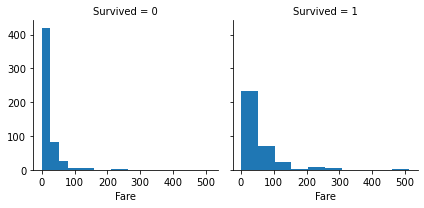

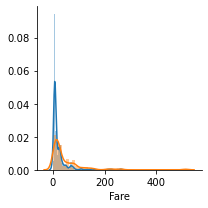

In [35]:
Pclass_Grid = sns.FacetGrid(train ,col = 'Survived')
Pclass_Grid.map(plt.hist,"Fare")

Pclass_Grid = sns.FacetGrid(train,hue = 'Survived')
Pclass_Grid.map(sns.distplot,"Fare" , rug = False , kde = True , hist = True)

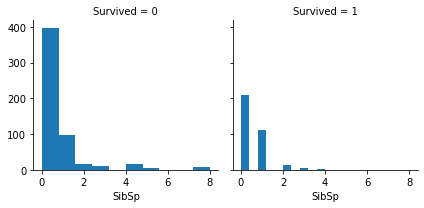

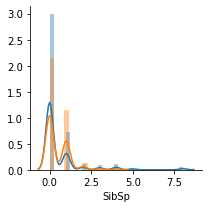

In [36]:
Pclass_Grid = sns.FacetGrid(train ,col = 'Survived')
Pclass_Grid.map(plt.hist,"SibSp")

Pclass_Grid = sns.FacetGrid(train,hue = 'Survived')
Pclass_Grid.map(sns.distplot,"SibSp" , rug = False , kde = True , hist = True)

## PDF and CDF 

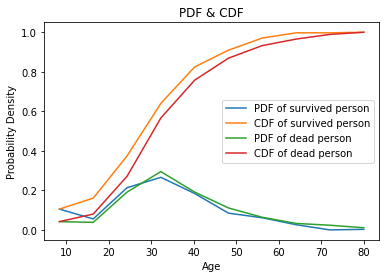

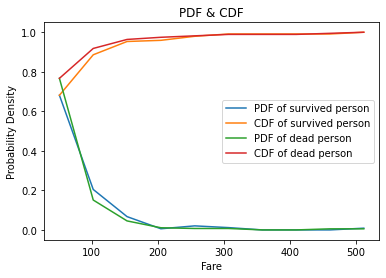

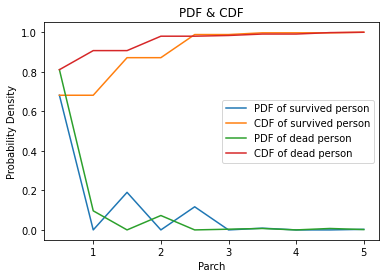

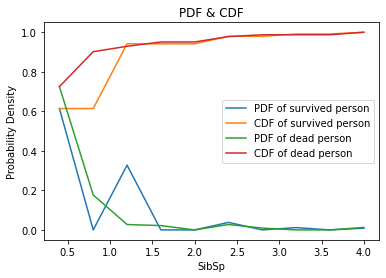

In [37]:
for i in ['Age','Fare','Parch','SibSp']:
    count, bin_edges= np.histogram(Survived[i])
    count2,bin_edges2=np.histogram(Dead[i])
    pdf_surv=count/sum(count)
    cdf_surv=np.cumsum(pdf_surv)
    pdf_dead=count2/sum(count2)
    cdf_dead=np.cumsum(pdf_dead)
    
    plt.title("PDF & CDF")
    plt.xlabel(i)
    plt.ylabel("Probability Density")
    plt.plot(bin_edges[1:],pdf_surv,label="PDF of survived person")
    plt.plot(bin_edges[1:],cdf_surv,label="CDF of survived person")
    plt.plot(bin_edges[1:],pdf_dead,label="PDF of dead person")
    plt.plot(bin_edges[1:],cdf_dead,label="CDF of dead person")

    plt.legend(loc="best")
    plt.show()
    

## Box Plot

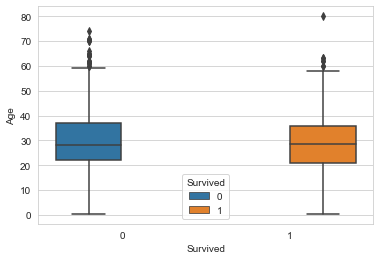

In [38]:
sns.set_style("whitegrid")
sns.boxplot(x = train['Survived'] , y = train['Age'] , hue = train['Survived'] )

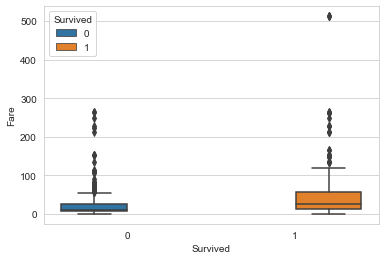

In [39]:
sns.set_style("whitegrid")
sns.boxplot(x = train['Survived'] , y = train['Fare'] , hue = train['Survived'] )

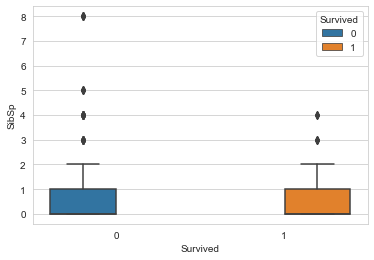

In [40]:
sns.set_style("whitegrid")
sns.boxplot(x = train['Survived'] , y = train['SibSp'] , hue = train['Survived'] )

## Bar Plot

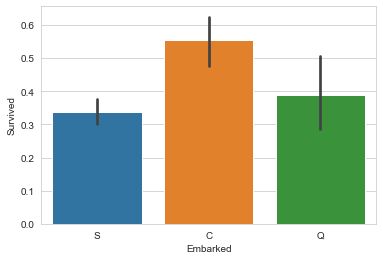

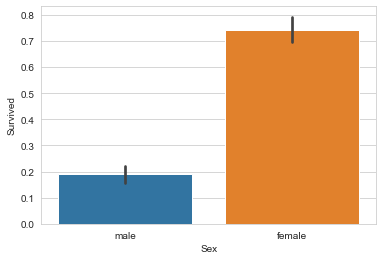

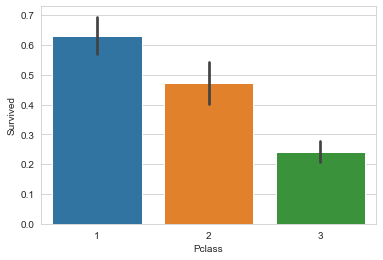

In [41]:
for i in ['Embarked','Sex','Pclass']:
     sns.barplot(y="Survived",x=i,data=data)
     plt.show()

People with PClass 1 , Embarked 'C' and are female have the highest chances of survival

## Violin Plot

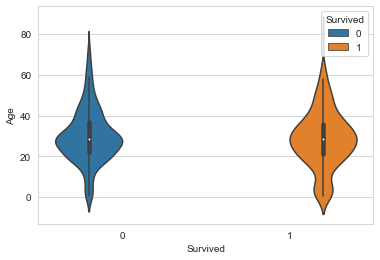

In [42]:
sns.set_style("whitegrid")
sns.violinplot(x = train['Survived'] , y = train['Age'] , hue = train['Survived'] )

Very few people having age greater than 45 have survived

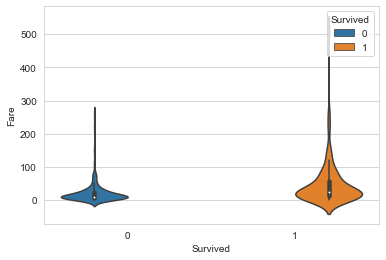

In [43]:
sns.set_style("whitegrid")
sns.violinplot(x = train['Survived'] , y = train['Fare'] , hue = train['Survived'] )

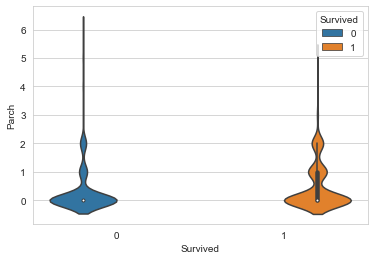

In [44]:
sns.set_style("whitegrid")
sns.violinplot(x = train['Survived'] , y = train['Parch'] , hue = train['Survived'] )

# BiVariate Analysis

## Pair Plot

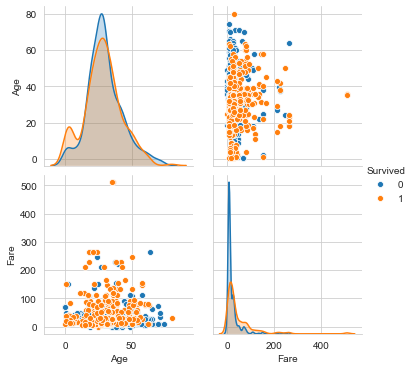

In [45]:
sns.pairplot(data = train ,vars = ['Age','Fare'] ,hue = 'Survived')

The data are highly mixed up, none of the variable-pairs can help us find linearly separable clusters hence we can't find "lines" and "if-else" conditions to build a simple model to classify the survive status of the passenger.

## HeatMap 

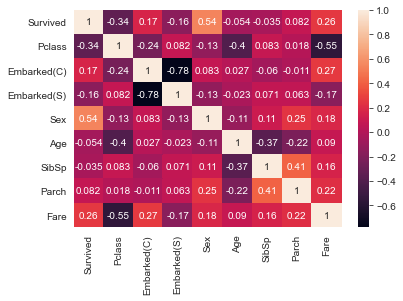

In [46]:
sns.heatmap(train.corr(),annot = True)

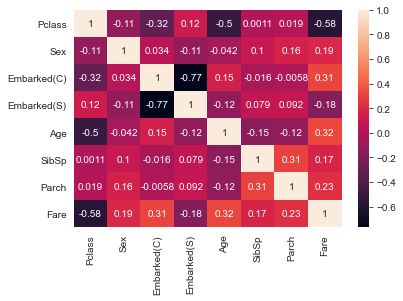

In [47]:
sns.heatmap(test.corr(),annot = True)

Used to find any correlation betweeen data. No special correlation found.

## Contour Plots

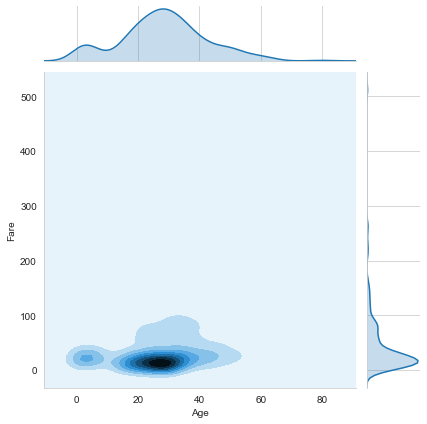

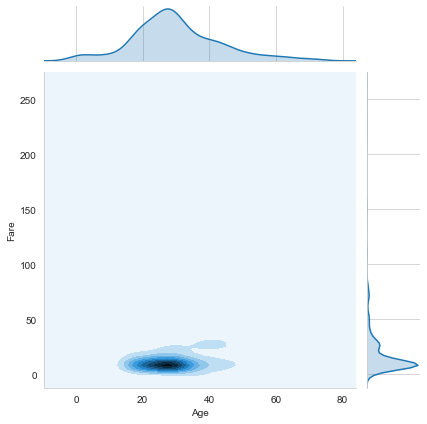

In [48]:
sns.jointplot(x = 'Age' , y = 'Fare' , data = Survived , kind = 'kde')
sns.jointplot(x = 'Age' , y = 'Fare' , data = Dead , kind = 'kde')


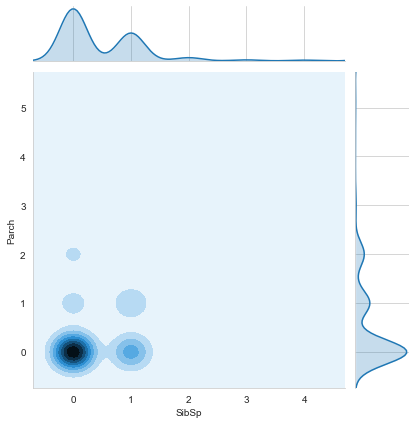

In [49]:
sns.jointplot(x = 'SibSp' , y = 'Parch' , data = Survived , kind = 'kde')

1) Among survivors maximum people are those who have value of both Parch and SibSp as 0. <br> 
2) Among the non-survivors most of them were of age 25-35 and had farebetween 15 and 30.